# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# feature selection
df.columns.tolist()
# I plan to drop 'fnlwgt', 'education', 'marital-status', 'relationship',
# 'capital-gain',  and 'capital-loss' because I believe they are either
# repetitive, their information is captured in a different feature, or
# they are categorical information that would make the model overly complex
# to one hot encode or simplify. 

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_binary']

In [5]:
# identify missing data 
nan_count_per_column = df.isnull().sum()
print(nan_count_per_column)
df.shape

# I will replace missing values with averages for numerical features and
# simply remove the rows that contain missing categorical information. I
# believe there are enough values in this dataset that it will not be an
# issue to remove them. I will be removing about 2,000 people from the
# total 32,000 people in the dataset. (There is signficant overlap between
# people with missing workclass & occupation.)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


(32561, 15)

In [6]:
# decide which features to turn into binary data
sex_unique = df['sex_selfID'].unique().tolist()
print(sex_unique) # already a binary value, just change the categorical labels to 0 & 1
native_unique = df['native-country'].unique().tolist()
print(native_unique) # too many countries to one hot encode, but it is an important feature, let's change it to US and non-US
income_unique = df['income_binary'].unique().tolist()
print(income_unique) # already a binary value, just change the categorical labels to 0 & 1
workclass_unique = df['workclass'].unique().tolist()
print(workclass_unique) # too many options to one hot encode, let's make it government and non-government

# decide which features to one hot encode
race_unique = df['race'].unique().tolist()
print(race_unique) # a very important feature and not too complex to one hot encode, so I will one hot encode race
occ_unique = df['occupation'].unique().tolist()
print(occ_unique) # a few too many unique options to one hot encode, but important to differentiate. I will sort these into white, blue, and grey collar jobs and then one hot encode based on those 3 values

['Non-Female', 'Female']
['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']
['<=50K', '>50K']
['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked']
['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Inuit', 'Other']
['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', nan, 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']


In [7]:
# checking class imbalance
column_frequencies = df['income_binary'].value_counts()
print(column_frequencies)
df.shape
# There is moderate class imbalance (24%/76% split). I will not address this initially because I want to use as
# much data as I can, but this is the first improvement I will make if necessary. As seen below, I did choose
# to eventually address the class imbaance.

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64


(32561, 15)

In [8]:
# checking for weird numerical values

# are there any negative numbers 
nums = df.select_dtypes(include=['int', 'float'])
any_negatives = (nums < 0).any().any()
print(any_negatives) # there are no negatives

# show min & max for each numerical feature
for column in nums.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Column: {column}, Min: {min_value}, Max: {max_value}")

# there likely are some outliers in hours-per-week, so I will winzorize later

False
Column: age, Min: 17.0, Max: 90.0
Column: fnlwgt, Min: 12285, Max: 1484705
Column: education-num, Min: 1, Max: 16
Column: capital-gain, Min: 0, Max: 14084
Column: capital-loss, Min: 0, Max: 4356
Column: hours-per-week, Min: 1.0, Max: 99.0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [9]:
# removing features
to_exclude = ['fnlwgt', 'education', 'marital-status', 'relationship', 'capital-gain', 'capital-loss']
df.drop(columns=to_exclude, inplace=True)
df.head(5)

,age,workclass,education-num,occupation,race,sex_selfID,hours-per-week,native-country,income_binary
0,39.0,State-gov,13,Adm-clerical,White,Non-Female,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Exec-managerial,White,Non-Female,13.0,United-States,<=50K
2,38.0,Private,9,Handlers-cleaners,White,Non-Female,40.0,United-States,<=50K
3,53.0,Private,7,Handlers-cleaners,Black,Non-Female,40.0,United-States,<=50K
4,28.0,Private,13,Prof-specialty,Black,Female,40.0,Cuba,<=50K


In [10]:
# identify missing data 
nan_count = np.sum(df.isnull(), axis = 0)
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

Index(['age', 'workclass', 'occupation', 'hours-per-week', 'native-country'], dtype='object')


In [11]:
# fill in missing values for numerical data with averages (age & hours-per-week)

# age
df.loc[df['age'].isnull()]
mean_ages=df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)

# hours-per-week
df.loc[df['hours-per-week'].isnull()]
mean_ages=df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_ages, inplace=True)

In [12]:
# drop the rows with missing categorical data 
df.dropna(subset=['workclass'], inplace=True)
df.dropna(subset=['occupation'], inplace=True)
df.dropna(subset=['native-country'], inplace=True)

In [13]:
# confirm no nan values left
df.isnull().values.any()

False

In [14]:
# make certain features binary values

# make sex a binary value, 0 for non-female and 1 for female
df.rename(columns={'sex_selfID': 'female-binary'}, inplace=True)
df['female-binary'] = df['female-binary'].replace('Non-Female', 0)
df['female-binary'] = df['female-binary'].replace('Female', 1)

# make native country a binary value, 0 for non-USA and 1 for USA
df.rename(columns={'native-country': 'from-USA-binary'}, inplace=True)
df.loc[df['from-USA-binary'] != 'United-States', 'from-USA-binary'] = 0
df['from-USA-binary'] = df['from-USA-binary'].replace('United-States', 1)

# make income a binary value, 0 for <=50K and 1 for >50K
df.rename(columns={'income_binary': 'more-than-50k-binary'}, inplace=True)
df['more-than-50k-binary'] = df['more-than-50k-binary'].replace('<=50K', 0)
df['more-than-50k-binary'] = df['more-than-50k-binary'].replace('>50K', 1)

# make workclass a binary value, 0 for non-government job and 1 for government job
df.rename(columns={'workclass': 'gov-job-binary'}, inplace=True)
gov_replace = {'State-gov': 1, 'Federal-gov': 1, 'Local-gov': 1}
df['gov-job-binary'].replace(gov_replace, inplace=True)
non_gov_replace = {'Self-emp-not-inc': 0, 'Private': 0, 'Self-emp-inc': 0, 'Without-pay': 0, 'Never-worked': 0}
df['gov-job-binary'].replace(non_gov_replace, inplace=True)

df.head(5)

,age,gov-job-binary,education-num,occupation,race,female-binary,hours-per-week,from-USA-binary,more-than-50k-binary
0,39.0,1,13,Adm-clerical,White,0,40.0,1,0
1,50.0,0,13,Exec-managerial,White,0,13.0,1,0
2,38.0,0,9,Handlers-cleaners,White,0,40.0,1,0
3,53.0,0,7,Handlers-cleaners,Black,0,40.0,1,0
4,28.0,0,13,Prof-specialty,Black,1,40.0,0,0


In [15]:
# one hot encoding for race 
race_one_hot_encoded = pd.get_dummies(df['race'], prefix='race')
df = pd.concat([df, race_one_hot_encoded], axis=1)
df.drop(columns=['race'], inplace=True)

df.head(5)

,age,gov-job-binary,education-num,occupation,female-binary,hours-per-week,from-USA-binary,more-than-50k-binary,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39.0,1,13,Adm-clerical,0,40.0,1,0,0,0,0,0,1
1,50.0,0,13,Exec-managerial,0,13.0,1,0,0,0,0,0,1
2,38.0,0,9,Handlers-cleaners,0,40.0,1,0,0,0,0,0,1
3,53.0,0,7,Handlers-cleaners,0,40.0,1,0,0,0,1,0,0
4,28.0,0,13,Prof-specialty,1,40.0,0,0,0,0,1,0,0


In [16]:
# one hot encoding for occupation
white_col_replace = {'Adm-clerical':'white', 
                     'Exec-managerial':'white', 
                     'Prof-specialty':'white', 
                     'Other-service':'white', 
                     'Sales':'white',
                     'Tech-support':'white'}
df['occupation'].replace(white_col_replace, inplace=True)
blue_col_replace = {'Handlers-cleaners':'blue', 
                    'Craft-repair':'blue',
                    'Transport-moving':'blue'}
df['occupation'].replace(blue_col_replace, inplace=True)
grey_col_replace = {'Farming-fishing':'grey', 
                    'Machine-op-inspct':'grey', 
                    'Protective-serv':'grey', 
                    'Armed-Forces':'grey', 
                    'Priv-house-serv':'grey'}
df['occupation'].replace(grey_col_replace, inplace=True)

occupation_one_hot_encoded = pd.get_dummies(df['occupation'], prefix='occupation')
df = pd.concat([df, occupation_one_hot_encoded], axis=1)
df.drop(columns=['occupation'], inplace=True)

df.head(5)

,age,gov-job-binary,education-num,female-binary,hours-per-week,from-USA-binary,more-than-50k-binary,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,occupation_blue,occupation_grey,occupation_white
0,39.0,1,13,0,40.0,1,0,0,0,0,0,1,0,0,1
1,50.0,0,13,0,13.0,1,0,0,0,0,0,1,0,0,1
2,38.0,0,9,0,40.0,1,0,0,0,0,0,1,1,0,0
3,53.0,0,7,0,40.0,1,0,0,0,1,0,0,1,0,0
4,28.0,0,13,1,40.0,0,0,0,0,1,0,0,0,0,1


In [17]:
# confirm no null values are left
df.isnull().values.any()

False

In [18]:
# winsorize numerical data

df['age'] = stats.mstats.winsorize(df['age'], limits=[0.01, 0.01])
df['education-num'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])

In [19]:
# check and standardize feature types

for column in df.columns:
    feature_type = df[column].dtypes
    print("Feature:", column)
    print("Data type:", feature_type)

for column in df.columns:
    feature_type = df[column].dtypes
    df[column] = df[column].astype(feature_type)

print("done")

Feature: age
Data type: float64
Feature: gov-job-binary
Data type: int64
Feature: education-num
Data type: int64
Feature: female-binary
Data type: int64
Feature: hours-per-week
Data type: float64
Feature: from-USA-binary
Data type: int64
Feature: more-than-50k-binary
Data type: int64
Feature: race_Amer-Indian-Inuit
Data type: uint8
Feature: race_Asian-Pac-Islander
Data type: uint8
Feature: race_Black
Data type: uint8
Feature: race_Other
Data type: uint8
Feature: race_White
Data type: uint8
Feature: occupation_blue
Data type: uint8
Feature: occupation_grey
Data type: uint8
Feature: occupation_white
Data type: uint8
done


In [20]:
# data preparation is done! 
print(df.shape)
df.head(5)

(30162, 15)


,age,gov-job-binary,education-num,female-binary,hours-per-week,from-USA-binary,more-than-50k-binary,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,occupation_blue,occupation_grey,occupation_white
0,39.0,1,13,0,40.0,1,0,0,0,0,0,1,0,0,1
1,50.0,0,13,0,13.0,1,0,0,0,0,0,1,0,0,1
2,38.0,0,9,0,40.0,1,0,0,0,0,0,1,1,0,0
3,53.0,0,7,0,40.0,1,0,0,0,1,0,0,1,0,0
4,28.0,0,13,1,40.0,0,0,0,0,1,0,0,0,0,1


In [21]:
# make random forest model 
y = df['more-than-50k-binary'] 
X = df.drop(columns = 'more-than-50k-binary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [22]:
print('Begin Random Forest Implementation...')
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)
rf_20_model.fit(X_train, y_train)
rf_20_predictions = rf_20_model.predict_proba(X_test)[:, 1].tolist()
rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_100_model.fit(X_train, y_train)
rf_100_predictions = rf_100_model.predict_proba(X_test)[:, 1].tolist()
print('End')

Begin Random Forest Implementation...
End


In [23]:
# evaluate preformance 
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, rf_20_predictions)
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, rf_100_predictions)

Plotting ROC Curve...


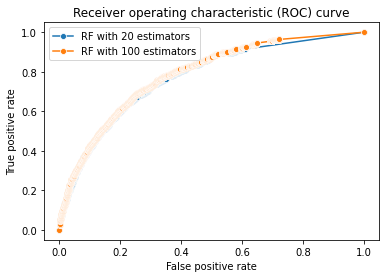

In [24]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [25]:
auc_20 = auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))
auc_100 = auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))

AUC of the RF model with 20 estimators is 0.775
AUC of the RF model with 100 estimators is 0.785


In [26]:
# after a first round of observing the preformance, let's use gridsearchcv to tune hyperparameters

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

rf_model = RandomForestClassifier(criterion='entropy')
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict_proba(X_test)[:, 1].tolist()

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.8s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.4s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.0s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   3.8s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.3s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   1.9s
[CV] max_depth=None, min_sampl

[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.3s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.3s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.2s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.4s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.3s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.3s
[CV] max_depth=None

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.9s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.9s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.9s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.9s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.9s
[CV] max_depth=10, min_samples_leaf=2, min_samples_s

[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.5s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.6s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.7s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   3.1s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   3.3s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   3.1s
[CV] max_depth=20, min_samples_leaf=1, min_samples_s

[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.1s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.1s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.1s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.2s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.2s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.3s
[CV] max_depth=20, min_samples_leaf=6, mi

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  6.5min finished


In [27]:
# evaluate preformance again of best parameter model
fpr, tpr, thresholds = roc_curve(y_test, best_rf_predictions)

Plotting ROC Curve...


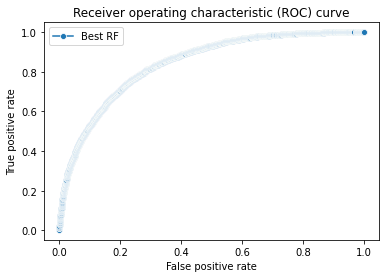

In [28]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr, y=tpr, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['Best RF'])
plt.show()

In [29]:
best_auc = auc(fpr, tpr)
print("AUC of the best RF model is {:.3f}".format(best_auc))

AUC of the best RF model is 0.843


In [30]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200}


In [31]:
# address class imbalance
rf_model = RandomForestClassifier(criterion='entropy', class_weight='balanced')
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)
balanced_rf_model = grid_search.best_estimator_
balanced_rf_predictions = balanced_rf_model.predict_proba(X_test)[:, 1].tolist()

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.9s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.8s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   3.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   3.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   3.6s
[CV] max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, total=   1.6s
[CV] max_depth=None, min_sampl

[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.2s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.1s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.1s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.3s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.3s
[CV] max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.5s
[CV] max_depth=None

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   1.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.9s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   1.8s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   2.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   2.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_s

[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.2s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.6s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.3s
[CV] max_depth=20, min_samples_leaf=1, min_samples_s

[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.3s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.1s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.1s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.2s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.4s
[CV] max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.3s
[CV] max_depth=20, min_samples_leaf=6, mi

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  6.6min finished


In [33]:
fpr, tpr, thresholds = roc_curve(y_test, balanced_rf_predictions)
balanced_auc = auc(fpr, tpr)
print("AUC of the balanced best RF model is {:.3f}".format(balanced_auc))

AUC of the balanced best RF model is 0.844


This suggests that fixing class imbalance did not significantly affect the accuracy of the model, but nonetheless improved it somewhat. 

An AUC of 0.844 suggests that the model is reasonably accurate at determining the binary income value and this is where I choose to stop observing the preformance and modifying it. 